In [1]:
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import average_correl_functions as acf
import matplotlib.pyplot as plt
import numpy as np

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
output_path_relax="../../../relax_times_yamls/protein/averages/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../timescales_yamls/protein/averages/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)
timescales_yamls=acf.set_biggest_ts_to_zero(timescales_yamls) # remove artificial weights of slow timescales 

Spin relaxation data exist for:

   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average

 
Timescales exist for:

   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * GWALP_di

In [3]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[10**-12,10**(-8)] # useful for observing details
ylim_weig=[0,1]
ylim=None # if None the whole range of available data is plotted


plot_output="time_scales_fin.pdf"
yscale="log"

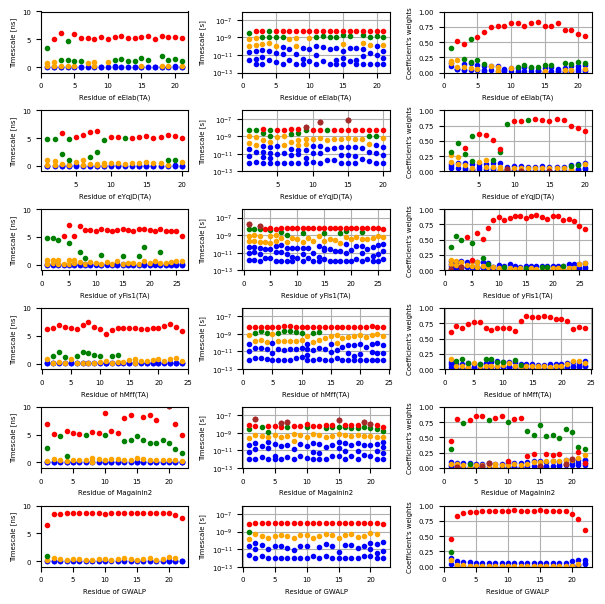

In [4]:
systems=[timescales_yamls["eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average"]["analysis0"],
        timescales_yamls["eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average"]["analysis0"],
        timescales_yamls["yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2"]["analysis0"],
        timescales_yamls["hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average"]["analysis0"],
        timescales_yamls["mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average"]["analysis0"],
        timescales_yamls["GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered"]["analysis0"]]  

names=["eElab(TA)","eYqjD(TA)","yFis1(TA)","hMff(TA)","Magainin2","GWALP"]
    
    
    #print(working_Ctimes)
plt.rcParams["figure.figsize"] = [6.00, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})


fig, axs = plt.subplots(6,3)

    
for k,system in enumerate(systems):    
    
    
    biggest_corr_time=np.log10(system["info"]['05_biggest_corr_time_[s]'])+12
    smallest_corr_time=np.log10(system["info"]['04_smallest_corr_time_[s]'])+12
    N_exp_to_fit=system["info"]['03_N_exp_to_fit']
    
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_list=[Ctimes]
    
    if k==5:
        for i in system["results"]["Coeff"]:
            if int(i)>23:
                Ctimes_list.append(system["results"]["Coeff"][i])

                Ctimes=np.array(Ctimes_list)
                Ctimes=np.transpose(Ctimes)

    else:
        
        for i in system["results"]["Coeff"]:
            Ctimes_list.append(system["results"]["Coeff"][i])

            Ctimes=np.array(Ctimes_list)
            Ctimes=np.transpose(Ctimes)

    
    working_Ctimes=np.copy(Ctimes)
    
    
    #axs[k,0].title.set_text(title)
    axs[k,1].set_ylim(Ctimes[0,0]/10,Ctimes[-1,0]*10)

    axs[k,1].grid()
    
    
    if yscale=="log":
        axs[k,1].set_yscale('log')
    axs[k,1].set_ylabel("Timescale [s]")
    axs[k,0].set_ylabel("Timescale [ns]")
    #ax1.set_xlabel(xlabel)
    #ax1.set_ylim([10**(-12.4), 10**(-6.8)])
    if not ylim==None:
        axs[k,1].set_ylim(ylim[0],ylim[1])
    if not ylim_weig==None:
        axs[k,2].set_ylim(ylim_weig[0],ylim_weig[1])
    else:
        axs[k,2].set_ylim(0,1)
    
    axs[k,0].set_ylim(-1,10)
        
    axs[k,2].grid()

    axs[k,2].set_ylabel("Coefficient's weights")
    axs[k,2].set_xlabel("Residue of "+str(names[k]))
    axs[k,1].set_xlabel("Residue of "+str(names[k]))
    axs[k,0].set_xlabel("Residue of "+str(names[k]))
    
    """Plot the timescales, user specifies the merge to be used.
    The merge works as follow: The code finds the first timescale with
    weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
    The final result is plotted as a weighted average of the merged points."""
    
    colors=["blue","orange","green","red","purple","brown","ping","gray","olive","cyan"]
    
    ms=3
    for residue in range(1,working_Ctimes.shape[1]):
        timescale=0
        while timescale < working_Ctimes.shape[0]:
            #print("{} {} \n".format(i, j))
            if working_Ctimes[timescale,residue]>0:
                time_to_plot=working_Ctimes[timescale,0]
                total_weight=working_Ctimes[timescale,residue]
                if merge>1:
                    time_to_plot=0
                    total_weight=0
                    for i in range(0,merge):
                        try:
                            time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                            total_weight+=working_Ctimes[timescale+i,residue]
                        except:
                            pass
                    time_to_plot/=total_weight
                                                       
                        
                if time_to_plot<groupTimes[0]:
                    axs[k,0].plot(residue, time_to_plot*10**9, marker="o", markersize=ms, markeredgecolor=colors[0], markerfacecolor=colors[0])                    
                    axs[k,1].plot(residue, time_to_plot, marker="o", markersize=ms, markeredgecolor=colors[0], markerfacecolor=colors[0])
                    axs[k,2].plot(residue, total_weight, marker="o", markersize=ms, markeredgecolor=colors[0], markerfacecolor=colors[0])
                else:
                    for i in range(0,len(groupTimes)-1):
                        if time_to_plot>groupTimes[i] and time_to_plot<groupTimes[i+1]:
                            axs[k,0].plot(residue, time_to_plot*10**9, marker="o", markersize=ms, markeredgecolor=colors[i+1], markerfacecolor=colors[i+1])                        
                            axs[k,1].plot(residue, time_to_plot, marker="o", markersize=ms, markeredgecolor=colors[i+1], markerfacecolor=colors[i+1])
                            axs[k,2].plot(residue, total_weight, marker="o", markersize=ms, markeredgecolor=colors[i+1], markerfacecolor=colors[i+1])
                        elif time_to_plot>groupTimes[-1]:
                            axs[k,0].plot(residue, time_to_plot*10**9, marker="o", markersize=ms, markeredgecolor=colors[len(groupTimes)+1], markerfacecolor=colors[len(groupTimes)+1])
                            axs[k,1].plot(residue, time_to_plot, marker="o", markersize=ms, markeredgecolor=colors[len(groupTimes)+1], markerfacecolor=colors[len(groupTimes)+1])
                            axs[k,2].plot(residue, total_weight, marker="o", markersize=ms, markeredgecolor=colors[len(groupTimes)+1], markerfacecolor=colors[len(groupTimes)+1])
                
                timescale+=merge-1
            timescale+=1     
fig.savefig(plot_output)
plt.show()   
